In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
dataset = pd.read_csv('StudentsPerformance.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         1000 non-null   object
 1   education      1000 non-null   object
 2   lunch          1000 non-null   object
 3   preparation    1000 non-null   int64 
 4   reading score  1000 non-null   int64 
 5   writing score  1000 non-null   int64 
 6   exam score     1000 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 54.8+ KB


In [13]:
X

array([["bachelor's degree", 'standard', 0, 72, 74],
       ['some college', 'standard', 1, 90, 88],
       ["master's degree", 'standard', 0, 95, 93],
       ...,
       ['high school', 'free', 1, 71, 65],
       ['some college', 'standard', 1, 78, 77],
       ['some college', 'free', 0, 86, 86]], dtype=object)

In [14]:
# encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

transformer = ColumnTransformer(
    transformers=[("categorical_encoder", OneHotEncoder(), [0, 1])], remainder='passthrough')
X = np.array(transformer.fit_transform(X))

In [15]:
X

array([[0.0, 1.0, 0.0, ..., 0, 72, 74],
       [0.0, 0.0, 0.0, ..., 1, 90, 88],
       [0.0, 0.0, 0.0, ..., 0, 95, 93],
       ...,
       [0.0, 0.0, 1.0, ..., 1, 71, 65],
       [0.0, 0.0, 0.0, ..., 1, 78, 77],
       [0.0, 0.0, 0.0, ..., 0, 86, 86]], dtype=object)

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
# random_state=0 for reproducibility:
# the model will always result in the same sequence of splits, given the same input data.
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

Text(0, 0.5, 'exam score')

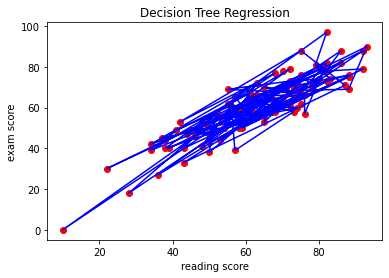

In [17]:
X_feature = X[:100, -1]
plt.scatter(X_feature, y[:100], c='r')
plt.plot(X_feature, regressor.predict(X[:100]), c='b')
plt.title('Decision Tree Regression')
plt.xlabel('reading score')
plt.ylabel('exam score')

In [18]:
# import export_graphviz
from sklearn.tree import export_graphviz

# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file='tree.dot')